**Generation of Pseudo Random Numbers using 32-bit linear Congruential Method.
Function to create a .dat file containing random numbers.**

In [ ]:
def create_dat_file(file_name,seed,number_of_data):
    count =0
    # list_of_ran = []
    seed =seed
    with open (file_name,'w') as f:
        while (count < number_of_data):
            ran1 = (16807*seed)%(2**31-1)
            seed = ran1
            x = ran1/2**31
            ran2 = (16807*seed)%(2**31-1)
            seed = ran2
            y = ran2/2**31
            count +=1    
            f.write(f'{str(x)},{str(y)}\n')
    f.close()

Setting the file name and number of data required and seed for each random number generation

In [ ]:
files_number = {'random1.dat':[1000,728743927],
                'random2.dat':[10000,3298792374],
                'random3.dat':[25000,82742893],
                'random4.dat':[50000,9398834]}

In [ ]:
for key,value in files_number.items():
    create_dat_file(file_name=key,number_of_data=value[0],seed=value[1])

Plotting x vs y from data files

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [14]:
#loading data
data1 = np.loadtxt('./random1.dat',delimiter=',')
x1 = data1[:,0]
y1 = data1[:,1]

data2 = np.loadtxt('./random2.dat',delimiter=',')
x2=data2[:,0]
y2=data2[:,1]

data3 = np.loadtxt('./random3.dat',delimiter=',')
x3=data3[:,0]
y3=data3[:,1]

data4 = np.loadtxt('./random4.dat',delimiter=',')
x4 = data4[:,0]
y4 = data4[:,1]

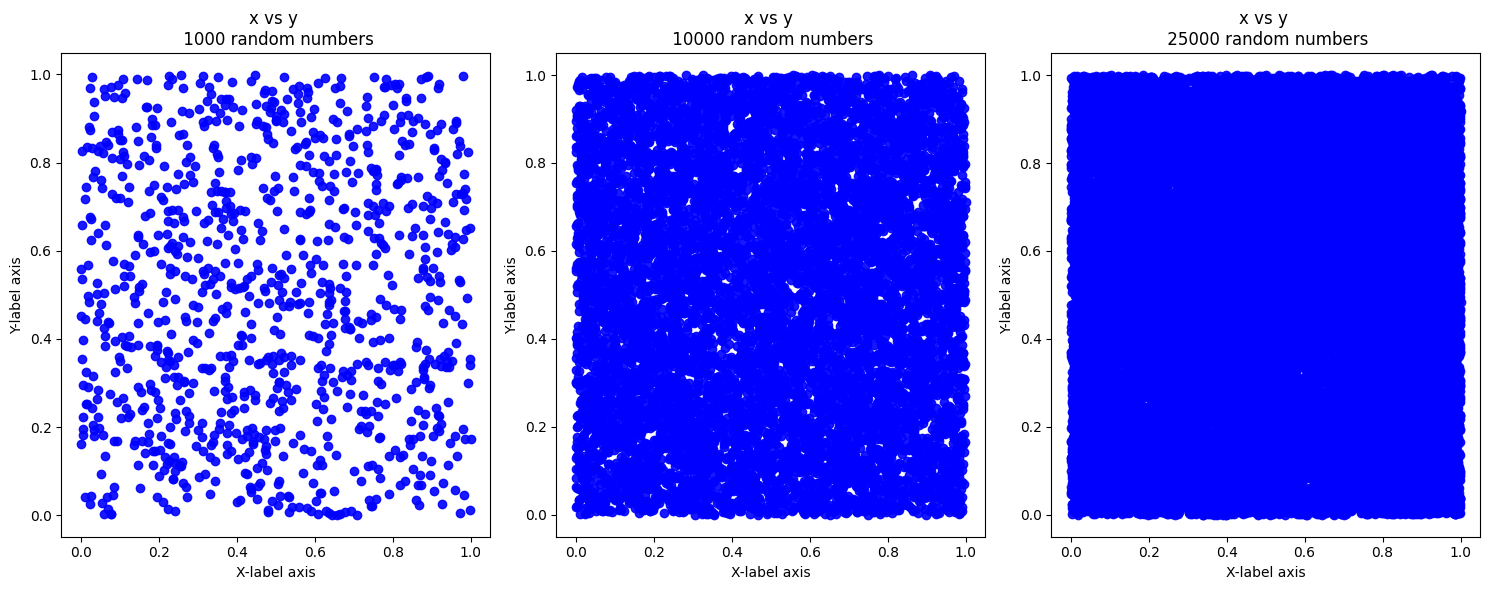

In [3]:

# colors = np.where(x == y,'red','blue')
fig,axes = plt.subplots(1,3,figsize=(15,6))

axes[0].scatter(x1,y1,c='blue',marker = 'o',alpha =0.9)
axes[0].set_xlabel('X-label axis')
axes[0].set_ylabel("Y-label axis")
axes[0].set_title("x vs y \n 1000 random numbers")

axes[1].scatter(x2,y2,c='blue',marker = 'o',alpha =0.9)
axes[1].set_xlabel('X-label axis')
axes[1].set_ylabel("Y-label axis")
axes[1].set_title("x vs y \n 10000 random numbers")

axes[2].scatter(x3,y3,c='blue',marker = 'o',alpha =0.9)
axes[2].set_xlabel('X-label axis')
axes[2].set_ylabel("Y-label axis")
axes[2].set_title("x vs y \n 25000 random numbers")

plt.tight_layout()

plt.show()


*From the above scatter plot for three different data file containing 1000, 10000, 25000 random numbers,  x vs y plot suggest that the more the number of random numbers the more uniform is the distribution*

**Histogram for random numbers generated using congruential method VS python inbuilt *random***

In [4]:
import random
# random.seed(728743927)
random_numbers_using_builtin_1000 = [random.random() for _ in range(1000)]
random_numbers_using_builtin_10000 = [random.random() for _ in range(10000)]
random_numbers_using_builtin_25000 = [random.random() for _ in range(25000)]

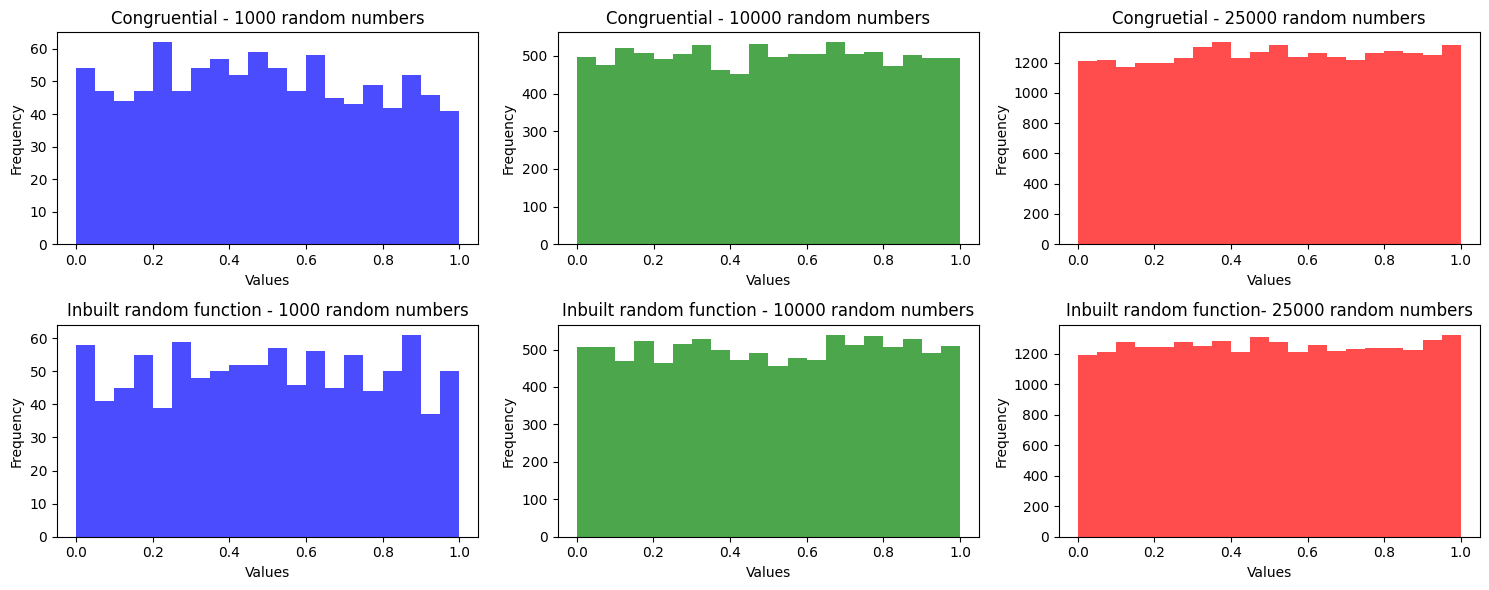

In [5]:

# Create subplots for histograms
fig, axes = plt.subplots(2, 3, figsize=(15, 6))

# Histogram for subplot 1
axes[0, 0].hist(x1, bins=20, color='blue', alpha=0.7)
axes[0, 0].set_xlabel('Values')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Congruential - 1000 random numbers')

# Histogram for subplot 2
axes[0, 1].hist(x2, bins=20, color='green', alpha=0.7)
axes[0, 1].set_xlabel('Values')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Congruential - 10000 random numbers')

# Histogram for subplot 3
axes[0, 2].hist(x3, bins=20, color='red', alpha=0.7)
axes[0, 2].set_xlabel('Values')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].set_title('Congruetial - 25000 random numbers')

# Histogram for subplot 4
axes[1, 0].hist(random_numbers_using_builtin_1000, bins=20, color='blue', alpha=0.7)
axes[1, 0].set_xlabel('Values')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Inbuilt random function - 1000 random numbers')

# Histogram for subplot 5
axes[1, 1].hist(random_numbers_using_builtin_10000, bins=20, color='green', alpha=0.7)
axes[1, 1].set_xlabel('Values')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Inbuilt random function - 10000 random numbers')

# Histogram for subplot 6
axes[1, 2].hist(random_numbers_using_builtin_25000, bins=20, color='red', alpha=0.7)
axes[1, 2].set_xlabel('Values')
axes[1, 2].set_ylabel('Frequency')
axes[1, 2].set_title('Inbuilt random function- 25000 random numbers')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


*Here , for same number of bins defined , the freq of the bins has been increased for 25000 random numbers generated using python inbuilt method, which indicated that python inbuilt random function generate more congested(uniform) random numbers than the congruential method with increase in number of random numbers to be generated.*

**Conversion of *uniform distribution* to *gaussian distribution* .** 

$ y_1 = (-2\log(random1))^\frac{1}{2} cos(2\pi \times random2) $ and  
$ y_2 = (-2\log(random1))^\frac{1}{2} sin(2\pi \times random2) $

*Lets convert 10000 random numbers from column x and y of randomData generated using congruential method*

In [6]:
ran_guss1 = ((-2*np.log(x2)))**0.5 *np.cos(2*np.pi*y2)
ran_guss2 = ((-2*np.log(x2)))**0.5 *np.sin(2*np.pi*y2)

Plotting the distribution:

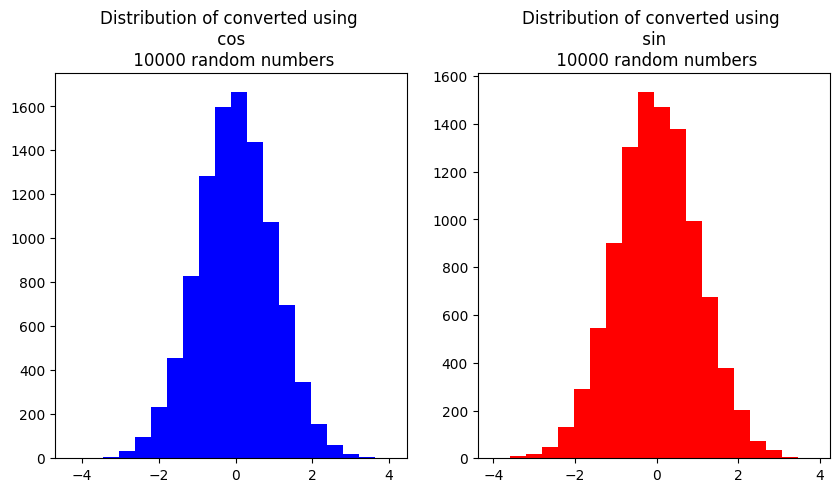

In [7]:
fig,axes=plt.subplots(1,2,figsize=(10,5))
axes[0].hist(ran_guss1,bins=20,color='blue')
axes[0].set_title("Distribution of converted using \n cos \n 10000 random numbers")
axes[1].hist(ran_guss2,bins=20,color='red')
axes[1].set_title("Distribution of converted using \n sin \n 10000 random numbers")
plt.show()

**squaring of random numbers**

In [8]:
sq_x = np.square(x2)

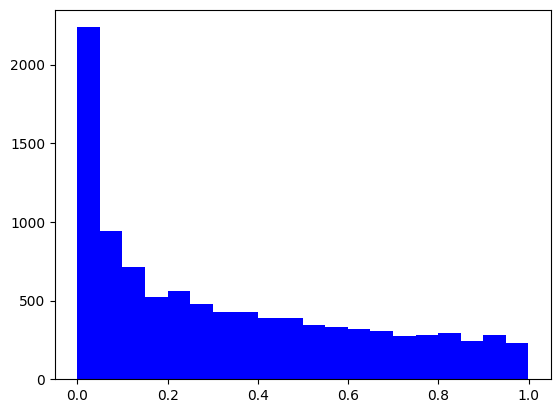

In [9]:
plt.hist(sq_x,bins=20,color='blue')
plt.show()


*Squaring of the random numbers wont produce gaussian distribution*

**Finding number of random number between range 0.1-0.2 , 0.2-0.3 and so on to 0.9-1.**

In [10]:
#using 10000 random numbers, from random2.dat , using column x 
bin_edges = np.arange(0.1, 1.1, 0.1)

# Create a histogram and get the counts in each bin
hist, _ = np.histogram(x2, bins=bin_edges)

# Display the counts for specified ranges
for i in range(len(hist)):
    lower_bound = bin_edges[i]
    upper_bound = bin_edges[i + 1]
    print(f"Range {lower_bound:.1f}-{upper_bound:.1f}: {hist[i]} random numbers")

Range 0.1-0.2: 1029 random numbers
Range 0.2-0.3: 997 random numbers
Range 0.3-0.4: 994 random numbers
Range 0.4-0.5: 985 random numbers
Range 0.5-0.6: 1004 random numbers
Range 0.6-0.7: 1039 random numbers
Range 0.7-0.8: 1018 random numbers
Range 0.8-0.9: 976 random numbers
Range 0.9-1.0: 986 random numbers


*This is similar to as making hist to get the distribution.*

**Mean and Standard Deviation of random numbers**

*mean and standard deviation is used to find the quality of the random number generated*

In [12]:
#lets compare the mean and std of the random numbers generated using congruential method and python inbuilt function. Lets take 10000,25000 and 50000 random numbers
# For 10000 random number
mean_value_for_congruential = np.mean(x2)
std_for_congruential = np.std(x2)
mean_value_for_inbuilt = np.mean(random_numbers_using_builtin_10000)
std_for_inbuilt = np.std(random_numbers_using_builtin_10000)
print(f"The mean value for congruential(10000 random numbers) is:{mean_value_for_congruential}, for inbuilt random function is:{mean_value_for_inbuilt}. \n The std for congruential(10000 random numbers) is:{std_for_congruential}, for inbuilt random function is:{std_for_inbuilt}")

The mean value for congruential(10000 random numbers) is:0.5000514388534706, for inbuilt random function is:0.5029663260560332. 
 The std for congruential(10000 random numbers) is:0.28778165569677855, for inbuilt random function is:0.29021468936234346


In [13]:
#lets compare the mean and std of the random numbers generated using congruential method and python inbuilt function. Lets take 10000,25000 and 50000 random numbers
# For 25000 random number
mean_value_for_congruential = np.mean(x3)
std_for_congruential = np.std(x3)
mean_value_for_inbuilt = np.mean(random_numbers_using_builtin_25000)
std_for_inbuilt = np.std(random_numbers_using_builtin_25000)
print(f"The mean value for congruential(25000 random numbers) is:{mean_value_for_congruential}, for inbuilt random function is:{mean_value_for_inbuilt}. \n The std for congruential(25000 random numbers) is:{std_for_congruential}, for inbuilt random function is:{std_for_inbuilt}")

The mean value for congruential(25000 random numbers) is:0.505162735295333, for inbuilt random function is:0.5021540607748638. 
 The std for congruential(25000 random numbers) is:0.2877368853506073, for inbuilt random function is:0.2887275791618834


In [16]:
#lets compare the mean and std of the random numbers generated using congruential method and python inbuilt function. Lets take 10000,25000 and 50000 random numbers
# For 50000 random number
random_numbers_using_builtin_50000 = [random.random() for _ in range(50000)]
mean_value_for_congruential = np.mean(x4)
std_for_congruential = np.std(x4)
mean_value_for_inbuilt = np.mean(random_numbers_using_builtin_50000)
std_for_inbuilt = np.std(random_numbers_using_builtin_50000)
print(f"The mean value for congruential(50000 random numbers) is:{mean_value_for_congruential}, for inbuilt random function is:{mean_value_for_inbuilt}. \n The std for congruential(25000 random numbers) is:{std_for_congruential}, for inbuilt random function is:{std_for_inbuilt}")

The mean value for congruential(50000 random numbers) is:0.4997562104189396, for inbuilt random function is:0.49977798186935407. 
 The std for congruential(25000 random numbers) is:0.2888443570498879, for inbuilt random function is:0.28827499433939646


*We found the inbuilt function perform better on generating random values for larger number of random numbers generated*

**Variance of Random numbers, 25000 random numbers**

In [17]:
var_congruential = np.var(x3)
var_inbuilt = np.var(random_numbers_using_builtin_25000)
print(f"variance congruential : {var_congruential} \n Variance inbuilt: {var_inbuilt}")

variance congruential : 0.08279251519126854 
 Variance inbuilt: 0.08336361496868165


**Plotting auto-correlation to test the quality of random numbers generated**

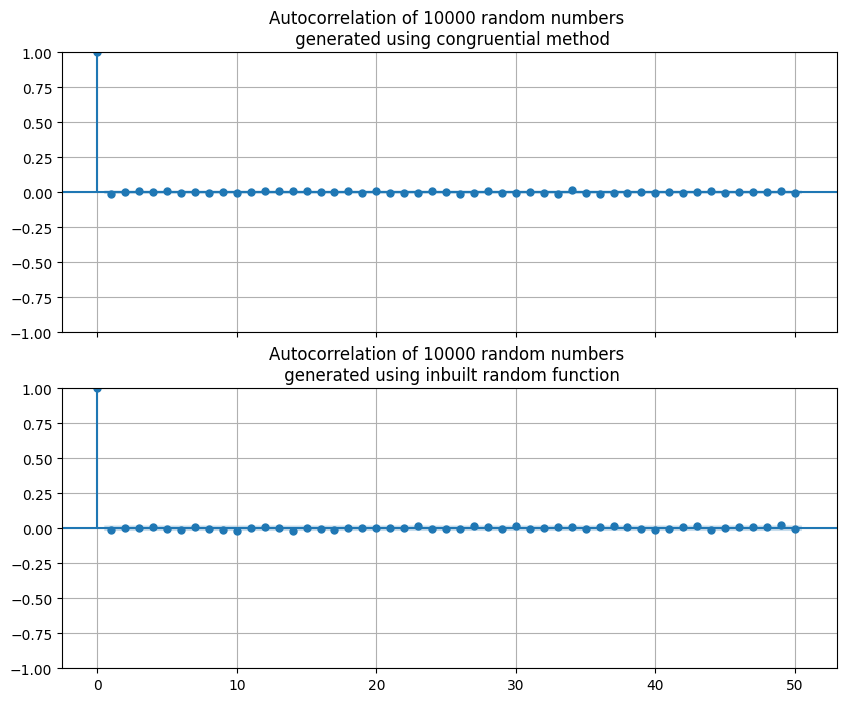

In [32]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Assuming x3 and random_numbers_using_builtin_10000 are your random number sequences
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 8))

plot_acf(x3, ax=ax1, lags=50, title='Autocorrelation of 10000 random numbers \n generated using congruential method')
ax1.grid(True)

plot_acf(random_numbers_using_builtin_10000, ax=ax2, lags=50, title='Autocorrelation of 10000 random numbers \n generated using inbuilt random function')
ax2.grid(True)

plt.show()


                                                      **THE END**                                                       